Tên: Nguyễn Thọ Anh Khoa

Facebook: Khoa Nguyễn KT

Lớp: AI Insight 

# Linear Regression - Exercise 2

## Đọc hiểu code (file D5, D6, D7, D8) về cách train bài toán linear regression theo cách thông thường và vectorization cho m and N sample.

D5 bài toán được thực hiện theo train m samples, cách thức tương tự như 1 smaple nhưng thêm 1 vòng lặp trong m sample để thực hiện tính toán cho từng sample, gradient của loss sẽ được lấy trung bình của m samples

In [ ]:
# full code 

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

# init weight
eta = 0.01
theta = np.array([-0.34, 0.04]) #[w, b]

# how long
epoch_max = 10

# mini-batch size
m = 2

losses = [] # for debug
for epoch in range(epoch_max):    
    for j in range(0, data_size, m):
        
        gradients = np.zeros((2,))
        sum_of_losses = 0         
        for index in range(j, j+m):
            xi = data[index]
            yi = prices[index]      

            # predict z/o
            oi = xi.dot(theta)

            # compute loss
            li = (oi - yi)*(oi - yi)  

            # compute gradient
            g_li = 2*(oi - yi)
            gradient_i = xi*g_li

            gradients = gradients + gradient_i
            sum_of_losses = sum_of_losses + li

        sum_of_losses = sum_of_losses/2
        losses.append(sum_of_losses)
        
        gradients     = gradients/2
        theta = theta - eta*gradients

D6 bài toán thực hiện cho m samples theo các vectorization, ở phần data sau khi stack theo [x, b] cần làm 1 bước transpose để thực hiện phép tính theo vectorization (columns là samples, row là features). Thực hiện theo vectorization đã giúp bỏ được 1 vòng lặp.
- Các transpose được thực hiện: data, theta, real output
- Hình bên dưới thể  giúp phân biệt np_dot and np_multiply 

![phân biệt np_dot và np_multiply](imgs/np_dot_and_multiply.png)


In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

# init weight
eta = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]

# how long
epoch_max = 10

# mini-batch size
m = 2

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(0, data_size, m):        
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]
        
        # predict z/o
        z = theta.T.dot(x)
        
        # compute loss
        loss = np.multiply((z-y.T), (z-y.T))
        losses.append(np.mean(loss))
        
        # compute gradient
        b = 2*(z-y.T)
        gradients = np.multiply(x, np.vstack((b, b)))
        gradients = gradients.dot(np.ones((m, 1)))/m

        # update weights
        theta = theta - eta*gradients

D7, D8 tương tự như D5, D6 nhưng thay vì mỗi lần step là m samples thì lần này mỗi step là toàn bộ samples

In [ ]:
# full code

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

n_epochs = 10
eta = 0.01

theta = np.array([[-0.34],[0.04]])

losses = [] # for debug
for epoch in range(n_epochs):
    sum_of_losses = 0
    gradients = np.zeros((2,1))
    
    for index in range(data_size):
        xi = data[index:index+1]
        yi = prices[index:index+1]

        oi = xi.dot(theta)
        li = (oi - yi)*(oi - yi)        
        g_li = 2*(oi - yi)
        
        cg = xi.T.dot(g_li)
        
        gradients = gradients + cg
        sum_of_losses = sum_of_losses + li
    
    sum_of_losses = sum_of_losses/data_size   
    losses.append(sum_of_losses[0][0]) 
    
    gradients     = gradients/data_size    
    theta = theta - eta*gradients    

In [ ]:
# full code
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

n_epochs = 10
eta = 0.01

# init weight
theta = np.array([[-0.34],[0.04]])

losses = [] # for debug
for epoch in range(n_epochs):
    # compute output
    z = theta.T.dot(data)
    
    # compute loss
    loss = np.multiply((z-prices.T), (z-prices.T))
    losses.append(np.mean(loss))
    
    # compute gradient
    b = 2*(z-prices.T)    
    gradient = np.multiply(data, np.vstack((b, b)))
    gradient = gradient.dot(np.ones((data_size, 1)))/data_size
    
    # update weights
    theta = theta - eta*gradient

## So sánh L1 loss (absolute error) và L2 loss (squared error). Nếu ưu nhược điểm của chúng

Giống: Cả 2 đều là Regression Loss, đều có mục đích là giúp cho model predict được giá trị gần giống với giá trị thật.

|    | Mean Absolute Error (L1_norm Loss) | Mean Square Error (L2_norm Loss)|
|:------|:------|:------|
| Định nghĩa| Độ lớn của sự khác biệt giữa giá trị dự đoán và giá trị thật.  | Bình phương giá độ lớn của sự khác biệt giữa giá trị dự đoán và giá trị thật| 
| Phương trình|  $MAE=\frac{\sum ^n _{i=0} |o_i - y_i|}{n}$   | $MSE=\frac{\sum ^n _{i=0} (o_i - y_i)^2}{n}$|
| Mục đích| Hướng đến việc tìm **median** bằng cách tính độ lớn trung bình khác biệt của prdict và giá trị thực mà không quan tâm về hướng (âm, dương).    | Hướng đến việc tìm **mean**. |
| Ưu Điểm | Giúp loại bỏ outliers.  | Dễ dàng thực hiện, đạo hàm là liên tục. Gradient sẽ giảm khi loss giảm.  |
| Nhược Điểm|  Gradient là giống nhau trong các lần update weight dân đến việc giá trị thay đổi sẽ lớn dù giá trị loss là nhỏ.   | Khi có outlier hàm dễ  tập trung vào oulier đó dẫn đến việc model đi theo hướng giảm thiểu outlier này mà bỏ qua các sample khác. |
| Ứng Dụng | Được sử dụng trong trường hợp các outlier là không quan trọng sẽ bỏ qua để đảm bạo performance của model.   | Trong trường hợp outlier là rất quan trọng và muốn học từ các outliers này. |


Đây là hình thể  hiện các bước đi sau update weight của MAE và MSE
![gradient_MAE_MSE](imgs/gradient_MAE_MSE.png)

0.3400000000000001
0.13400000000000004
2.24
20.084


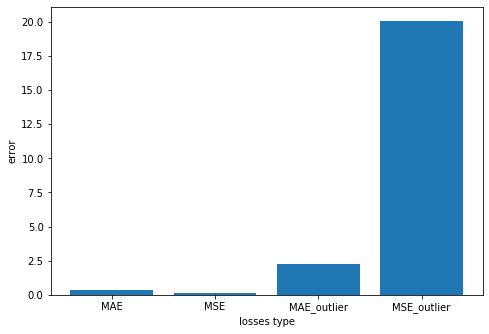

In [ ]:
def MAE_function(o, y):
    return np.abs(o-y).sum()/len(y)

def MSE_function(o, y):
    return np.sum((o-y)**2)/len(y)

y = np.array([1, 2, 3, 4, 5])
o = np.array([1.3, 1.5, 3.2, 3.8, 5.5])
o_outlier = np.array([1.3, 1.5, 3.2, 3.8, 15])

MAE_e_o = MAE_function(o, y)
MSE_e_o = MSE_function(o, y)

MAE_e_o_outlier = MAE_function(o_outlier, y)
MSE_e_o_outlier = MSE_function(o_outlier, y)

print(MAE_e_o)
print(MSE_e_o)
print(MAE_e_o_outlier)
print(MSE_e_o_outlier)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
losses = ['MAE', 'MSE', 'MAE_outlier', 'MSE_outlier']
students = [MAE_e_o,MSE_e_o,MAE_e_o_outlier,MSE_e_o_outlier]
ax.bar(losses,students)
ax.set_xlabel('losses type')
ax.set_ylabel('error')
plt.show()

##  Tìm hiểu về Huber loss và cách Huber loss khắc phục nhược điểm của 2 hàm loss trên. Cài đặt Huber loss cho các chương trình ở file D5, D6, D7, D8.

Vấn đề chung của MAE và MSE không thể  giải quyết được là khi khi data có các outliers không quá quan trọng nhưng cũng không thể bỏ qua được. Cho ví dụ môt tập data có 85% output là 150, và 15% là 30, nếu sử dụng MAE 15% này sẽ gần như không được học và model hướng về 150, nếu sử dụng MSE thì distribution cũng không còn là đối xứng. 

Từ đó Huber loss được tạo ra để khắc phục vấn đề về outliers này bằng cách kết hợp MAE và MSE giúp cho việc tận dụng được các thế mạnh của MAE và MSE. Nếu loss nhỏ hơn một giá trị nhất định delta, sử dụng MSE còn các trường hợp còn lại sử dụng MAE.

![hubber_fnc](imgs/hubber_function.png)

Ý nghĩa của việc sử dụng delta là khi loss quá lớn (loss > delta) do outlier thì sẽ hạn chế bớt sự thay đổi của model khi quá chú trong vào outlier bằng MAE (các vùng biên của distribution), đối với loss thấp thì MSE sẽ được tận dụng để chú trọng vào các error hơn.

Khuyết điểm của thuật toán này là phải lựa chọn tham số  delta. 

**D5 sử dụng Huber loss**

In [ ]:
# full code 

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

# init weight
eta = 0.01
theta = np.array([-0.34, 0.04]) #[w, b]

# how long
epoch_max = 20

# mini-batch size
m = 2

def huble_loss(o, y, delta):
    abs_diff = abs(o - y) 
    if abs_diff <= delta:
        #MSE
        return  0.5*(o-y)**2
    else:
        #MAE
        return delta * abs(o-y) - 0.5*(delta**2)
        
def g_huble_loss(o, y, delta):
    abs_diff = abs(o - y)
    if abs_diff <= delta:
        #MSE
        return  (o-y)
    else:
        #MAE
        return delta * (o-y)/abs(o-y)

delta = 1
losses = [] # for debug
for epoch in range(epoch_max):    
    for j in range(0, data_size, m):
        
        gradients = np.zeros((2,))
        sum_of_losses = 0         
        for index in range(j, j+m):
            xi = data[index]
            yi = prices[index]      

            # predict z/o
            oi = xi.dot(theta)

            # compute huble loss
            
            li = huble_loss(oi, yi, delta)  

            # compute gradient
            g_li = g_huble_loss(oi, yi, delta)
            gradient_i = xi*g_li

            gradients = gradients + gradient_i
            sum_of_losses = sum_of_losses + li

        sum_of_losses = sum_of_losses/2
        losses.append(sum_of_losses)
        
        gradients     = gradients/2
        theta = theta - eta*gradients

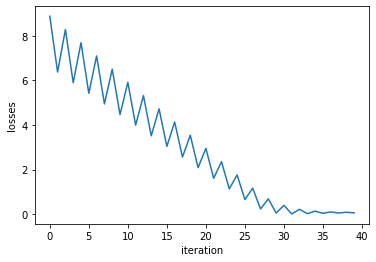

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

**D6 sử dụng Huber loss**

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

# init weight
eta = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]

# how long
epoch_max = 20

# mini-batch size
m = 2

def huble_loss(o, y, delta):
    abs_diff = abs(o - y) 
    MSE = 0.5*(o-y)**2
    MAE = delta * abs(o-y) - 0.5*(delta**2)
    return np.where(abs_diff <= delta, MSE, MAE)
        
def g_huble_loss(o, y, delta):
    abs_diff = abs(o - y)
    b_MSE = (o-y)
    b_MAE = delta * (o-y)/abs(o-y)  
    return np.where(abs_diff <= delta, b_MSE, b_MAE) 

delta = 1
losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(0, data_size, m):        
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]
        
        # predict z/o
        z = theta.T.dot(x)
        
        # compute loss
        loss = huble_loss(z, y.T, delta)
        losses.append(np.mean(loss))
        
        # compute gradient
        b = g_huble_loss(z, y.T, delta)
        gradients = np.multiply(x, b)
        gradients = gradients.dot(np.ones((m, 1)))/m
        

        # update weights
        theta = theta - eta*gradients

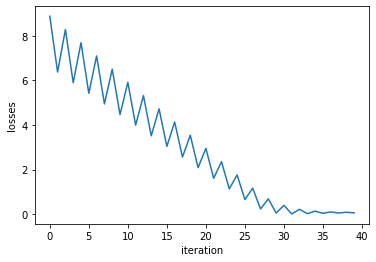

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

**D7 sử dụng Huber loss**

In [ ]:
# full code

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

n_epochs = 10
eta = 0.01

theta = np.array([[-0.34],[0.04]])

def huble_loss(o, y, delta):
    abs_diff = abs(o - y) 
    if abs_diff <= delta:
        #MSE
        return  0.5*(o-y)**2
    else:
        #MAE
        return delta * abs(o-y) - 0.5*(delta**2)
        
def g_huble_loss(o, y, delta):
    abs_diff = abs(o - y)
    if abs_diff <= delta:
        #MSE
        return  (o-y)
    else:
        #MAE
        return delta * (o-y)/abs(o-y)
    
delta = 1
losses = [] # for debug
for epoch in range(n_epochs):
    sum_of_losses = 0
    gradients = np.zeros((2,1))
    
    for index in range(data_size):
        xi = data[index:index+1]
        yi = prices[index:index+1]

        oi = xi.dot(theta)
        li = huble_loss(oi, yi, delta)        
        g_li = g_huble_loss(oi, yi, delta) 
        cg = xi.T.dot(g_li)
        
        gradients = gradients + cg
        sum_of_losses = sum_of_losses + li
    
    sum_of_losses = sum_of_losses/data_size   
    losses.append(sum_of_losses[0][0]) 
    
    gradients     = gradients/data_size    
    theta = theta - eta*gradients    

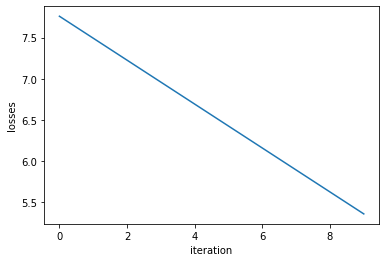

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

**D8 sử dụng Huber loss**

In [ ]:
# full code
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

n_epochs = 10
eta = 0.01

# init weight
theta = np.array([[-0.34],[0.04]])

def huble_loss(o, y, delta):
    abs_diff = abs(o - y) 
    MSE = 0.5*(o-y)**2
    MAE = delta * abs(o-y) - 0.5*(delta**2)
    return np.where(abs_diff <= delta, MSE, MAE)
        
def g_huble_loss(o, y, delta):
    abs_diff = abs(o - y)
    b_MSE = (o-y)
    b_MAE = delta * (o-y)/abs(o-y)  
    return np.where(abs_diff <= delta, b_MSE, b_MAE) 

delta = 1

losses = [] # for debug
for epoch in range(n_epochs):
    # compute output
    z = theta.T.dot(data)
    
    # compute loss
    loss = huble_loss(z, prices.T, delta)
    losses.append(np.mean(loss))
    
    # compute gradient
    b = g_huble_loss(z, prices.T, delta) 
    gradient = np.multiply(data, b)
    gradient = gradient.dot(np.ones((data_size, 1)))/data_size
    
    # update weights
    theta = theta - eta*gradient

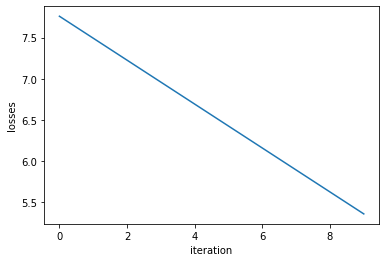

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

##  Xây dựng công thức linear regression cho N sample khi vector x có dạng sau: 𝒙 = [𝑠𝑎𝑚𝑝𝑙𝑒𝑁 𝑠𝑎𝑚𝑝𝑙𝑒 … 1] (sắp xếp theo chiều ngang, khác với chiều dọc trong bài học).

- Tính output $\pmb{o^{(i)}}$ 
$$\pmb{o = \theta^Tx}$$
- Tính loss $$\pmb{L = (o - y)^2}$$
- Tính đạo hàm $$\pmb{k = 2(o-y)}$$
$$\pmb{L_\theta ^{'} = \begin{bmatrix} 1 & 1 ... & 1\end{bmatrix} ( \begin{bmatrix} k & k ... & k\end{bmatrix} \odot x)}$$

- Cập nhật tham số $$\pmb{\theta} = \pmb{\theta} - \eta \frac{\pmb{\sum(L^{'T}_\theta})}{N}$$

## Cài đặt linear regression cho bài toán advertising theo 2 cách (cách thông thường và vectorization) dùng m sample (mini-batch gradient descent). Data advertising: https://www.dropbox.com/s/ve57nlqwikgjzrh/advertising.csv?dl=0

cách thông thuowngf

In [ ]:
# full code 

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',')
tv = data[1:,0]
rad = data[1:,1]
news = data[1:,2]
sales  = data[1:,3]
data_size = tv.size


# vector [x, b]
data = np.c_[tv, rad, news,  np.ones((data_size, 1))]

# init weight
b = 0.01
w1 = 0.01
w2 = 0.02
w3 = 0.03
eta = 0.000001
theta = np.array([w1, w2, w3, b]) #[w, b]

# how long
epoch_max = 1

# mini-batch size
m = 16

losses = [] # for debug
for epoch in range(epoch_max):    
    for j in range(0, data_size, m):
        
        gradients = np.zeros((4,))
        sum_of_losses = 0         
        for index in range(j, min(j+m, data_size)):
            xi = data[index]
            yi = sales[index]      

            # predict z/o
            oi = xi.dot(theta)

            # compute loss
            li = (oi - yi)*(oi - yi)  

            # compute gradient
            g_li = 2*(oi - yi)
            gradient_i = xi*g_li
            gradients = gradients + gradient_i
            sum_of_losses = sum_of_losses + li

        sum_of_losses = sum_of_losses/2
        losses.append(sum_of_losses)
        
        gradients     = gradients/2
        theta = theta - eta*gradients
print(len(losses))

13


vectorization

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('advertising.csv', delimiter=',')
tv = data[1:,0]
rad = data[1:,1]
news = data[1:,2]
sales  = data[1:,3:]
data_size = tv.size

# vector [x, b]
data = np.c_[tv, rad, news, np.ones((data_size, 1))]
data = data.T

# init weight
b = 0.01
w1 = 0.01
w2 = 0.02
w3 = 0.03
eta = 0.000001
theta = np.array([[w1], [w2], [w3], [b]]) #[w, b]

# how long
epoch_max = 10

# mini-batch size
m = 4

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(0, data_size, m):        
        # get m samples
        x = data[:, i:i+m]
        y = sales[i:i+m, :]
        # predict z/o
        z = theta.T.dot(x)
        
        # compute loss
        loss = np.multiply((z-y.T), (z-y.T))
        losses.append(np.mean(loss))
        
        # compute gradient
        b = 2*(z-y.T)
        gradients = np.multiply(x, np.vstack((b, b,b,b)))
        gradients = gradients.dot(np.ones((m, 1)))/m

        # update weights
        theta = theta - eta*gradients

OSError: ignored

## References

https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0

https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3

https://medium.com/@gobiviswaml/huber-error-loss-functions-3f2ac015cd45

https://towardsdatascience.com/generalized-huber-regression-505afaff24c